In [12]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree



In [2]:
iris = load_iris()

X = iris.data
y = iris.target

print("Feature names:", iris.feature_names)
print("Target names:", iris.target_names)


Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42
)


In [4]:
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)


In [5]:
gb_model.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [13]:
def plot_n_gb_stumps(gb_model, N, class_index=0):

    for i in range(N):
        plt.figure(figsize=(10, 6))
        plot_tree(
            gb_model.estimators_[i][class_index],
            feature_names=iris.feature_names,
            class_names=iris.target_names,
            filled=True
        )
        plt.title(f"Gradient Boosting - Stump {i+1} (Class: {iris.target_names[class_index]})")
        plt.show()


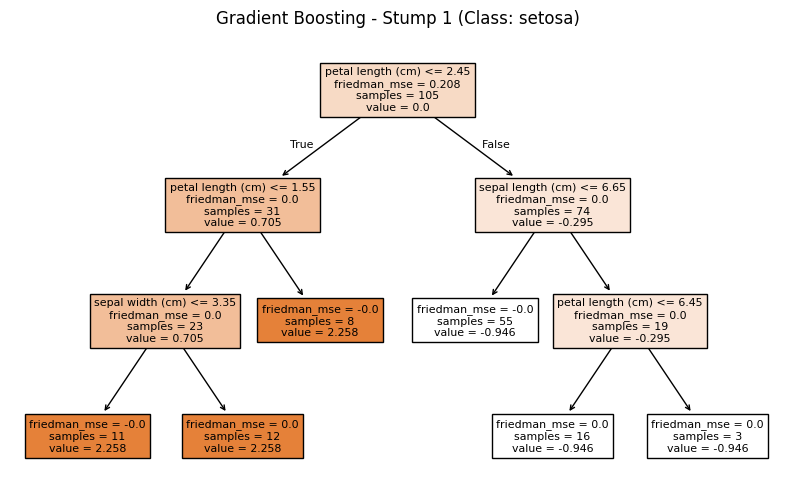

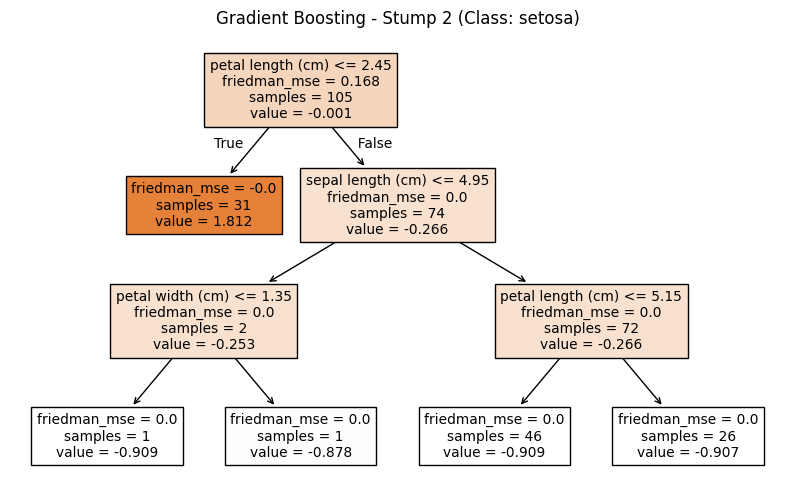

In [14]:
plot_n_gb_stumps(gb_model, N=2)


In [6]:
y_pred = gb_model.predict(X_test)


In [7]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Accuracy: 1.0

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [8]:
N = 5   # change this to 2, 3, 4, 10, etc.
